In [1]:
from figures import *

In [2]:
# Default parameters.
dt = 1e-2
k0 = 1/10
beta = 1
gamm = 1/2
tau = 50

# Create default parameter set.
Nx = 50
xparams = createparams( Nx, [beta, gamm], tau, k0=1/10 )
xstr = roots( xparams )

Ny = 500
yparams = createparams( Ny, [beta, gamm], tau, k0=1/10 )
ystr = roots( yparams )

Nz = 10
zparams = createparams( Nz, [beta, gamm], tau, k0=1/10 )
zstr = roots( zparams )

print( xparams )
print( yparams )
print( zparams )

{'N': 50, 'bk': 0.7071067811865476, 'beta': 1, 'gamm': 0.5, 'rho1': 0, 'rho2': 0.1, 'tau': 50, 'alpha': 1.5, 'k0': 0.1}
{'N': 500, 'bk': 2.23606797749979, 'beta': 1, 'gamm': 0.5, 'rho1': 0, 'rho2': 0.1, 'tau': 50, 'alpha': 1.5, 'k0': 0.1}
{'N': 10, 'bk': 0.316227766016838, 'beta': 1, 'gamm': 0.5, 'rho1': 0, 'rho2': 0.1, 'tau': 50, 'alpha': 1.5, 'k0': 0.1}


In [3]:
# Initial condition list.
n = 3
x0list = [[a0, 1-a0, 0] for a0 in np.linspace( 1/4,3/4,n )]
y0list = x0list.copy()
z0list = x0list.copy()

# Simulate over time-series.
T = 2500;  dt = 1e-2
xdata = [simulate( xparams, T, x0, dt=dt ) for x0 in x0list]
ydata = [simulate( yparams, T, y0, dt=dt ) for y0 in y0list]
zdata = [simulate( zparams, T, z0, dt=dt ) for z0 in z0list]

# Unpack single simulation run.
tlist, xlist = xdata[1]
_, ylist = ydata[1]
_, zlist = zdata[1]

In [8]:
cut = round( 200/dt )

# Compute the period observed in the simulation.
print( 'Mean oscillation period (x):', dt*np.mean( np.diff( find_peaks( xlist.T[0][-cut:] )[0] ) ) )
print( 'Mean oscillation period (y):', dt*np.mean( np.diff( find_peaks( ylist.T[0][-cut:] )[0] ) ) )
print( 'Mean oscillation period (z):', dt*np.mean( np.diff( find_peaks( zlist.T[0][-cut:] )[0] ) ) )

# Compute the mean activity observed over the last
xmean = np.mean( xlist.T[0][-cut:] )
ymean = np.mean( ylist.T[0][-cut:] )
zmean = np.mean( zlist.T[0][-cut:] )

print( '' )
print( 'Mean activity (x):', xmean, Nx*xmean )
print( 'Mean activity (y):', ymean, Ny*ymean )
print( 'Mean activity (z):', zmean, Nz*zmean )

# Compute the mean activity observed over the last
xpeak = np.max( xlist.T[0][-cut:] )
ypeak = np.max( ylist.T[0][-cut:] )
zpeak = np.max( zlist.T[0][-cut:] )

print( '' )
print( 'Burst height (x):', xpeak, Nx*xpeak )
print( 'Burst height (y):', ypeak, Ny*ypeak )
print( 'Burst height (z):', zpeak, Nz*zpeak )

Mean oscillation period (x): 64.005
Mean oscillation period (y): 55.51
Mean oscillation period (z): 78.01

Mean activity (x): 0.0957201991425018 4.786009957125089
Mean activity (y): 0.0810229916296825 40.511495814841254
Mean activity (z): 0.09426094726970893 0.9426094726970893

Burst height (x): 0.2273492240127276 11.36746120063638
Burst height (y): 0.1537144897914196 76.8572448957098
Burst height (z): 0.09527249375492367 0.9527249375492366


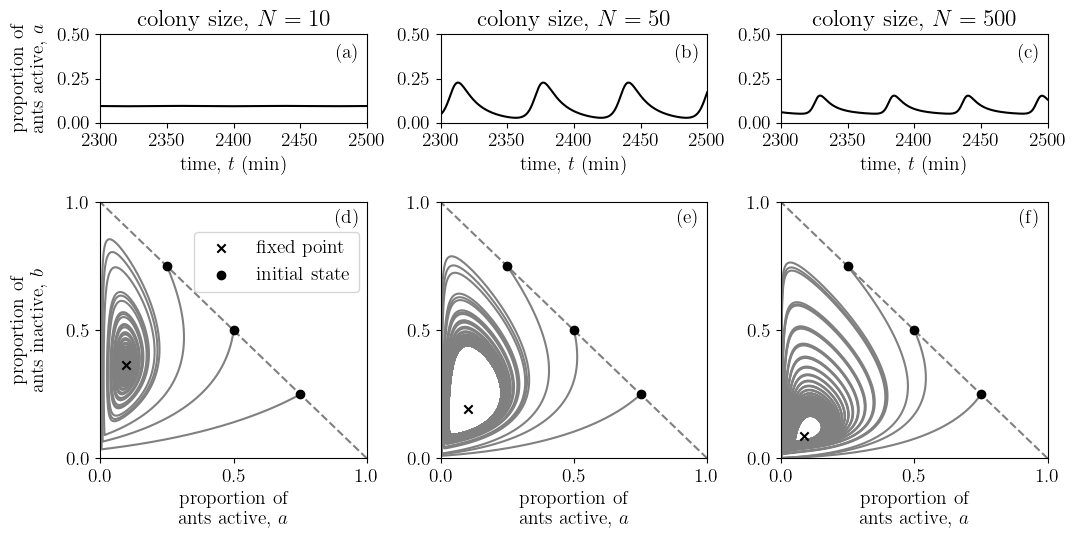

In [5]:
# Plot evolution of time-series and poincare map intersections.
fig = plt.figure()
gvar = gs.GridSpec( 6,9 )

axs = [fig.add_subplot( gvar[:2,:3] ), fig.add_subplot( gvar[2:,:3] )]
axs += [fig.add_subplot( gvar[:2,3:6], sharex=axs[0], sharey=axs[0] ),
    fig.add_subplot( gvar[2:,3:6], sharex=axs[1], sharey=axs[1] )]
axs += [fig.add_subplot( gvar[:2,6:], sharex=axs[0], sharey=axs[0] ),
    fig.add_subplot( gvar[2:,6:], sharex=axs[1], sharey=axs[1] )]

# axs[0].scatter( -1, -1, color='k', marker='x', label='fixed point' )
# axs[0].scatter( -1, -1, color='k', label='initial state' )

# Plot activity for time-series 'z'.
axs[0].plot( tlist[-cut:], zlist.T[0][-cut:], color='k' )

axs[0].text( 0.975*(tlist[-1] - tlist[-cut]) + tlist[-cut], 0.45, '(a)', va='top', ha='right' )

axs[0].set_xlim( [T-dt*cut,T] )
axs[0].set_ylim( [0,1/2] )

axs[0].set_xlabel( 'time, $t$ (min)' )
axs[0].set_ylabel( 'proportion of\nants active, $a$' )
axs[0].set_title( 'colony size, $N=%i$' % Nz )

# Plot phase space diagram.
axs[1].scatter( zstr[0], zstr[1],
    color='k', marker='x', zorder=100 )#, label='fixed point' )

for z0, (ttest, ztest) in zip( z0list, zdata ):
    axs[1].scatter( z0[0], z0[1], color='k', zorder=100 )
    axs[1].plot( ztest.T[0], ztest.T[1], color='grey' )

axs[1].plot( [1,0], [0,1], color='grey', linestyle='--' )

axs[1].text( 0.975, 0.975, '(d)', va='top', ha='right' )

axs[1].set_xlim( [0,1] );  axs[1].set_xticks( [0,1/2,1] )
axs[1].set_ylim( [0,1] );  axs[1].set_yticks( [0,1/2,1] )

axs[1].set_xlabel( 'proportion of\nants active, $a$' )
axs[1].set_ylabel( 'proportion of\nants inactive, $b$' )

axs[1].scatter( -1, -1, color='k', marker='x', label='fixed point' )
axs[1].scatter( -1, -1, color='k', label='initial state' )

# Plot activity for time-series 'x'.
axs[2].plot( tlist[-cut:], xlist.T[0][-cut:], color='k' )

axs[2].text( 0.975*(tlist[-1] - tlist[-cut]) + tlist[-cut], 0.45, '(b)', va='top', ha='right' )

axs[2].set_xlim( [T-dt*cut,T] )
axs[2].set_ylim( [0,1/2] )

axs[2].set_xlabel( 'time, $t$ (min)' )
axs[2].set_title( 'colony size, $N=%i$' % Nx )

# Plot phase space diagram.
axs[3].scatter( xstr[0], xstr[1],
    color='k', marker='x', zorder=100, label='fixed point' )

for x0, (ttest, xtest) in zip( x0list, xdata ):
    axs[3].scatter( x0[0], x0[1], color='k', zorder=100 )
    axs[3].plot( xtest.T[0], xtest.T[1], color='grey' )

axs[3].plot( [1,0], [0,1], color='grey', linestyle='--' )

axs[3].text( 0.975, 0.975, '(e)', va='top', ha='right' )

axs[3].set_xlim( [0,1] )
axs[3].set_ylim( [0,1] )

axs[3].set_xlabel( 'proportion of\nants active, $a$' )

# Plot activity for time-series 'y'.
axs[4].plot( tlist[-cut:], ylist.T[0][-cut:], color='k' )

axs[4].text( 0.975*(tlist[-1] - tlist[-cut]) + tlist[-cut], 0.45, '(c)', va='top', ha='right' )

axs[4].set_xlim( [T-dt*cut,T] )
axs[4].set_ylim( [0,1/2] )

axs[4].set_xlabel( 'time, $t$ (min)' )
axs[4].set_title( 'colony size, $N=%i$' % Ny )

# Plot phase space diagram.
axs[5].scatter( ystr[0], ystr[1],
    color='k', marker='x', zorder=100, label='fixed point' )

for y0, (ttest, ytest) in zip( y0list, ydata ):
    axs[5].scatter( y0[0], y0[1], color='k', zorder=100 )
    axs[5].plot( ytest.T[0], ytest.T[1], color='grey' )

axs[5].plot( [1,0], [0,1], color='grey', linestyle='--' )

axs[5].text( 0.975, 0.975, '(f)', va='top', ha='right' )

axs[5].set_xlabel( 'proportion of\nants active, $a$' )

for a in axs:
    a.yaxis.set_label_coords( -0.20, 0.5 )

axs[1].legend( loc=(0.35,0.65), frameon=True )

fig.set_figwidth( 11 )
fig.set_figheight( 5.6 )
fig.tight_layout()

if 0:
    savefigure( fig, 'results/oscillation_comparison' )